In [ ]:
# Google Drive 접근을 위한 Mount 적용.
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')# Google Drive 접근을 위한 Mount 적용.
import os, sys
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 강의:  
###딥러닝 컴퓨터 비전 완벽가이드 (인프런)  
###출처:   
### https://github.com/chulminkw/DLCV_New/tree/main/faster_rcnn

# mmcv 설치

In [ ]:
import torch
print(torch.__version__)

2.0.1+cu118


In [ ]:
# !pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 torchaudio==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu116
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 torchaudio==0.13.0 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 999.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 2.0.2+cu118
    Uninstalling torchaudio-2.0.2+cu118:
      Successfully uninstalled torchaudio-2.0.2+cu118
ERROR: pip's dependency resolver does not currently take into account all th

In [ ]:
pip install mmcv-full==1.7.0 -f https://download.openmmlab.com/mmcv/dist/cu117/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu117/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 5.3 MB/s eta 0:00:00


# mmdetection 다운로드

In [ ]:
#!git clone https://github.com/open-mmlab/mmdetection.git
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git

Cloning into 'mmdetection'...
remote: Enumerating objects: 36296, done.
remote: Counting objects: 100% (947/947), done.
remote: Compressing objects: 100% (503/503), done.
remote: Total 36296 (delta 484), reused 764 (delta 431), pack-reused 35349
Receiving objects: 100% (36296/36296), 56.79 MiB | 31.05 MiB/s, done.
Resolving deltas: 100% (25417/25417), done.


In [ ]:
cd mmdetection

'/content/mmdetection'

In [ ]:
!python setup.py install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [ ]:
from mmdet.apis import init_detector, inference_detector
import mmcv

/usr/local/lib/python3.10/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


# 데이터 load 테스트

In [ ]:
pwd

'/content'

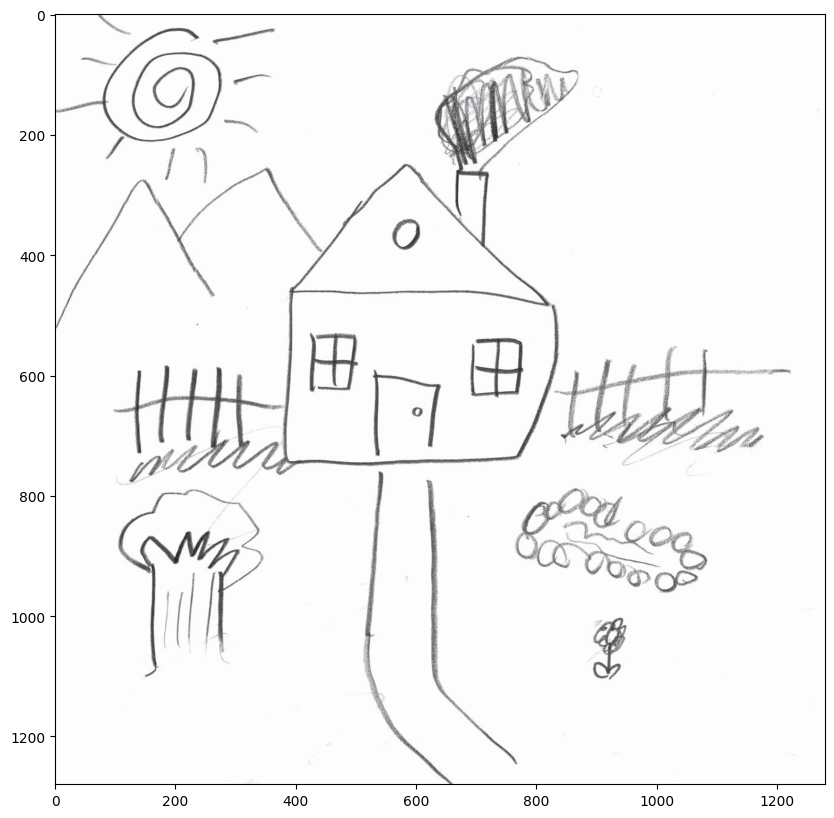

In [ ]:
import matplotlib.pyplot as plt
import cv2

origin = cv2.imread('gdrive/MyDrive/HTP_dataset/house/image/house_2.jpg')
img = cv2.cvtColor(origin, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 10))
plt.imshow(img)

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
import glob

filenames = []
files = sorted(glob.glob('*.jpg'))

for i in range(len(files)):
    f = open("./train.txt",'a')
    f.write(files[i] + '\n')

In [ ]:
import glob

filenames = []
files = sorted(glob.glob('*.jpg'))

for i in range(len(files)):
    f = open("./test.txt",'a')
    f.write(files[i] + '\n')

In [ ]:
cd ..

/content


In [ ]:
from glob import glob
from sklearn.model_selection import train_test_split

img_file_list = []
def extract_name(img_list):
	img_file_list = []
	for file_path in img_list:
		names = file_path.split('/')
		names = names[-1]
		names = names.split('.')
		img_file_list.append(names[0])

	return img_file_list

path = "gdrive/MyDrive/HTP_dataset/house" #학습을 돌릴 path => train.txt와 val.txt를 저장할 path
image_path= "gdrive/MyDrive/HTP_dataset/house/image" # 이미지가 있는 디렉토리, 나는 절대 경로를 넣어두는 편이다.
#val_image_path = "gdrive/MyDrive/HTP_dataset/house/val/image"
img_list = glob(f'{image_path}/*') # 이미지 파일들의 이름 들을 읽어온 후 리스트로 저장한다.
img_file_list = extract_name(img_list)

train_img_list,val_img_list = train_test_split(img_file_list,train_size=0.8,random_state=2000)

print(len(train_img_list),len(val_img_list))

with open(f'{path}/train.json','w') as f:
	f.write('\n'.join(train_img_list)+'\n')

with open(f'{path}/val.json','w') as f:
	f.write('\n'.join(val_img_list)+'\n')

800 200


In [ ]:
train_img_list[:10]

['house_832',
 'house_379',
 'house_3',
 'house_579',
 'house_419',
 'house_958',
 'house_899',
 'house_884',
 'house_352',
 'house_335']

In [ ]:
import json
import tqdm
import os

In [ ]:
# 모든 classes의 이름을 읽어오는 함수 HOUSE_CLASSES에 저장할 것
def get_classes_names(annot_path):
    annots = [os.path.join(annot_path, s) for s in list(filter(lambda x: x.endswith('.json'), os.listdir(annot_path)))]
    #print(annots)
    idx = 0
    label_count = {}
    label_mapping = {}
    #annots = tqdm(annots)
    for annot in annots:
        exist_flag = False
        idx += 1
        with open(annot,'r', encoding='utf-8') as f:
            json_data = json.load(f)

        num_objs = json_data['annotations']['bbox']

        for obj in num_objs:
            label_name = obj['label']
            if label_name not in label_count:
                label_count[label_name] = 1
            else:
                label_count[label_name] += 1

            if label_name not in label_mapping:
                label_mapping[label_name] = len(label_mapping)


    return label_count, label_mapping

In [ ]:
ls

gdrive/  mmdetection/  sample_data/


In [ ]:
labels_count, label_mapping = get_classes_names('gdrive/MyDrive/HTP_dataset/house/labels')

In [ ]:
labels = list(label_mapping)
labels

['whole_house',
 'roof',
 'wall',
 'door',
 'window',
 'chimney',
 'smoke',
 'fence',
 'path',
 'pond',
 'mountain',
 'tree',
 'flower',
 'grass',
 'sun']

In [ ]:
def get_bboxes(jsonfile):
    bbox_names = []
    bboxes = []
    with open(jsonfile, 'r', encoding='utf-8') as f:
        jsondata = json.load(f)
    n_bboxes = jsondata['annotations']['bbox']
    #print(n_bboxes)
    for i in n_bboxes:
        bbox_names.append(i['label'])
        #print(bbox_names)
        x1 = int(i['x'])
        y1 = int(i['y'])
        x2 = int(i['x']) + int(i['w'])
        y2 = int(i['y']) + int(i['h'])
        bboxes.append([x1, y1, x2, y2])

    return bbox_names, bboxes

In [ ]:
import os.path
import numpy as np

from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

HOUSE_CLASSES = labels
# pascal voc 데이터셋처럼 이미지, 어노테이션 파일이 각각 있는 상태에서
# MSCOCO 형식 (각각 한 파일에 모든 이미지, 어노테이션 정보가 전부 담기도록 변경)
@DATASETS.register_module(force=True)
class HTPDataset(CustomDataset):
    CLASSES = HOUSE_CLASSES

    def load_annotations(self, ann_file):
        cat2label = {k:i for i, k in enumerate(self.CLASSES)}
        image_list = mmcv.list_from_file(self.ann_file)
        data_infos = []

        for image_id in image_list:
            filename = '{0:}/{1:}.jpg'.format(self.img_prefix, image_id)
            image = cv2.imread(filename)
            #print(filename)
            height, width = image.shape[:2]
            data_info = {'filename': filename, 'width':width, 'height':height}
            #print(data_info)
            label_prefix = self.img_prefix.replace('image','labels')
            anno_json_file = os.path.join(label_prefix, str(image_id)+'.json')
            #print(anno_json_file)
            if not os.path.exists(anno_json_file):
                continue
            anno_dir = label_prefix
            bbox_names, bboxes = get_bboxes(anno_json_file)

            gt_bboxes = []
            gt_labels = []
            gt_bboxes_ignore = []
            gt_labels_ignore = []

            for bbox_name, bbox in zip(bbox_names, bboxes):
                if bbox_name in cat2label:
                    gt_bboxes.append(bbox)
                    gt_labels.append(cat2label[bbox_name])
                else:
                    gt_bboxes_ignore.append(bbox)
                    gt_labels_ignore.append(-1)
            data_anno = {
                'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
                'labels': np.array(gt_labels, dtype=np.long),
                'bbox_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1,4),
                'label_ignore':np.array(gt_labels_ignore, dtype=np.long)
            }
            data_info.update(ann=data_anno)
            #print(data_info)
            data_infos.append(data_info)

        return data_infos

In [ ]:
ls

gdrive/  mmdetection/  sample_data/


In [ ]:
config_file = './mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = './mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
mkdir checkpoints

In [ ]:
 cd ..

/content


In [ ]:
!wget -O ./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2023-06-01 11:15:29--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 8.48.85.209, 8.48.85.213, 8.48.85.211, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|8.48.85.209|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

./mmdetection/check 100%[===================>] 159.54M  7.71MB/s    in 21s     

2023-06-01 11:15:51 (7.48 MB/s) - ‘./mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [ ]:
from mmcv import Config

cfg = Config.fromfile(config_file)
print(cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

In [ ]:
pwd

'/content'

In [ ]:
# Google Drive 밑에 Directory 생성. 이미 생성 되어 있을 시 오류 발생.
!mkdir "gdrive/MyDrive/htp_dir"

mkdir: cannot create directory ‘gdrive/MyDrive/htp_dir’: File exists


In [ ]:
!nvidia-smi

Thu Jun  1 11:15:52 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    46W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
cd mmdetection

/content/mmdetection


In [ ]:
from mmdet.apis import set_random_seed

# dataset에 대한 환경 파라미터 수정.
cfg.dataset_type = 'HTPDataset'
cfg.data_root = '/content/gdrive/MyDrive/HTP_dataset/house'

# train, val, test dataset에 대한 type, data_root, ann_file, img_prefix 환경 파라미터 수정.
cfg.data.train.type = 'HTPDataset'
cfg.data.train.data_root = '/content/gdrive/MyDrive/HTP_dataset/house' #/content/gdrive/MyDrive/HTP_dataset/house/train.txt
cfg.data.train.ann_file = 'train.txt'
cfg.data.train.img_prefix = 'image'

cfg.data.val.type = 'HTPDataset'
cfg.data.val.data_root = '/content/gdrive/MyDrive/HTP_dataset/house/'
cfg.data.val.ann_file = 'val.txt'
cfg.data.val.img_prefix = 'image'

# class의 갯수 수정.
cfg.model.roi_head.bbox_head.num_classes = 15
# pretrained 모델
cfg.load_from = 'checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'

# 학습 weight 파일로 로그를 저장하기 위한 디렉토리로 구글 Drive 설정.
cfg.work_dir = '/content/gdrive/MyDrive/htp_dir'

# 학습율 변경 환경 파라미터 설정.
cfg.optimizer.lr = 0.02 / 8
cfg.lr_config.warmup = None
cfg.log_config.interval = 1

cfg.runner.max_epochs = 1

# 평가 metric 설정.
cfg.evaluation.metric = 'mAP'
# 평가 metric 수행할 epoch interval 설정.
cfg.evaluation.interval = 20
# 학습 iteration시마다 모델을 저장할 epoch interval 설정.
cfg.checkpoint_config.interval = 50

# 학습 시 Batch size 설정(단일 GPU 별 Batch size로 설정됨)
cfg.data.samples_per_gpu = 4

# Set seed thus the results are more reproducible
cfg.seed = 0
set_random_seed(0, deterministic=False)
cfg.gpu_ids = range(1)
# 두번 config를 로드하면 lr_config의 policy가 사라지는 오류로 인하여 설정.
cfg.lr_config.policy='step'

cfg.device='cuda'
# We can initialize the logger for training and have a look
# at the final config used for training
print(f'Config:\n{cfg.pretty_text}')

Config:
model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_w

In [ ]:
cd mmdetection

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection


In [ ]:
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector

# train용 Dataset 생성.
datasets = [build_dataset(cfg.data.train)]

<ipython-input-16-f60a635750df>:48: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'labels': np.array(gt_labels, dtype=np.long),
<ipython-input-16-f60a635750df>:50: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which

In [ ]:
datasets

[
 HTPDataset Train dataset with number of images 800, and instance counts: 
 +-----------------+-------+-----------+-------+-------------+-------+------------+-------+------------+-------+
 | category        | count | category  | count | category    | count | category   | count | category   | count |
 +-----------------+-------+-----------+-------+-------------+-------+------------+-------+------------+-------+
 | 0 [whole_house] | 801   | 1 [roof]  | 809   | 2 [wall]    | 810   | 3 [door]   | 815   | 4 [window] | 1431  |
 | 5 [chimney]     | 811   | 6 [smoke] | 811   | 7 [fence]   | 1182  | 8 [path]   | 843   | 9 [pond]   | 806   |
 | 10 [mountain]   | 969   | 11 [tree] | 998   | 12 [flower] | 1789  | 13 [grass] | 3443  | 14 [sun]   | 800   |
 +-----------------+-------+-----------+-------+-------------+-------+------------+-------+------------+-------+]

In [ ]:
datasets[0].CLASSES

['whole_house',
 'roof',
 'wall',
 'door',
 'window',
 'chimney',
 'smoke',
 'fence',
 'path',
 'pond',
 'mountain',
 'tree',
 'flower',
 'grass',
 'sun']

In [ ]:
cd mmdetection

[Errno 2] No such file or directory: 'mmdetection'
/content/mmdetection


In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

# train_detector를 통한 학습 시작

In [ ]:
model = build_detector(cfg.model, train_cfg=cfg.get('train_cfg'), test_cfg=cfg.get('test_cfg'))
model.CLASSES = datasets[0].CLASSES

mmcv.mkdir_or_exist(os.path.abspath(cfg.work_dir))
# epochs는 config의 runner 파라미터로 지정됨. 기본 12회
train_detector(model, datasets, cfg, distributed=False, validate=True)

2023-06-01 11:19:57,236 - mmdet - INFO - Automatic scaling of learning rate (LR) has been disabled.
<ipython-input-16-f60a635750df>:48: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  'labels': np.array(gt_labels, dtype=np.long),
<ipython-input-16-f60a635750df>:50: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In 

# 데이터의 일부를 추출해 inference_detector로 검증

In [ ]:
# from mmdet.apis import inference_detector, init_detector, show_result_pyplot

# BGR Image 사용
# img = cv2.imread('/content/gdrive/MyDrive/HTP_dataset/house/image/house_306.jpg')

# model.cfg = cfg

# result = inference_detector(model, img)
# show_result_pyplot(model, img, result, score_thr=0.3)

## 추출한 데이터 추론 결과 확인

In [ ]:
#result

# 저장된 학습 결과를 이용하여 모델 생성 & 결과 확인

In [ ]:
from mmdet.apis import show_result_pyplot

checkpoint_file = '/content/gdrive/MyDrive/htp_dir/epoch_100.pth'

# checkpoint 저장된 model 파일을 이용하여 모델을 생성, 이때 Config는 위에서 update된 config 사용.
model_ckpt = init_detector(cfg, checkpoint_file, device='cuda:0')
# BGR Image 사용
# img = cv2.imread('/content/gdrive/MyDrive/HTP_dataset/house/image/house_88.jpg')
model_ckpt.cfg = cfg

# result = inference_detector(model, img)
# show_result_pyplot(model, img, result, score_thr=0.3)

load checkpoint from local path: /content/gdrive/MyDrive/htp_dir/epoch_100.pth


# validation 이미지 list 확인

In [ ]:
# val_img_list[:5]

# validation 이미지 prefix

In [ ]:
# img_prefix = '/content/gdrive/MyDrive/HTP_dataset/house/image/'

# validation 이미지 path 생성 함수

In [ ]:
# def extract_path(img_prefix, file_list):
#     val_img_paths = []
#     for i in file_list:
#         img_path = img_prefix + i + '.jpg'
#         val_img_paths.append(img_path)
#     return val_img_paths

# validation 이미지 전체에 대해 path 생성

In [ ]:
# val_img_lists = extract_path(img_prefix, val_img_list)

# 생성된 path 확인

In [ ]:
# val_img_lists[:10]

# cv2로 이미지를 읽어서 validation 이미지를 val_imgs에 저장

In [ ]:
# import cv2
# val_imgs = [cv2.imread(x) for x in val_img_lists]

# val_imgs 확인

In [ ]:
#type(val_imgs), len(val_imgs), val_imgs[0].shape

## garbage collecting

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

# val_imgs 100개에 대해 학습한 결과를 저장해둔 모델로 추론

In [ ]:
#results = inference_detector(model_ckpt, val_imgs[:100])

# results 확인 (첫 번째 그림에서 15개의 object에 대해 detection 함)

In [ ]:
#len(results[0])

# 모델이 이미지로부터 object detection을 수행하고 detection한 bbox의 좌표와 label을 반환하는 함수

In [ ]:
labels_to_names_seq = {i:k for i, k in enumerate(HOUSE_CLASSES)}

 #model과 원본 이미지 array, filtering할 기준 class confidence score를 인자로 가지는 inference 시각화용 함수 생성.
def get_detected_img(model, img_array,  score_threshold=0.7, is_print=True):
  lists = []
  # 인자로 들어온 image_array를 복사.
  draw_img = img_array.copy()
  bbox_color=(0, 255, 0)
  text_color=(0, 0, 255)

  # model과 image array를 입력 인자로 inference detection 수행하고 결과를 results로 받음.
  # results는 80개의 2차원 array(shape=(오브젝트갯수, 5))를 가지는 list.
  results = inference_detector(model, img_array)

  # 80개의 array원소를 가지는 results 리스트를 loop를 돌면서 개별 2차원 array들을 추출하고 이를 기반으로 이미지 시각화
  # results 리스트의 위치 index가 바로 COCO 매핑된 Class id. 여기서는 result_ind가 class id
  # 개별 2차원 array에 오브젝트별 좌표와 class confidence score 값을 가짐.
  for result_ind, result in enumerate(results):
    # 개별 2차원 array의 row size가 0 이면 해당 Class id로 값이 없으므로 다음 loop로 진행.
    if len(result) == 0:
      continue

    # 2차원 array에서 5번째 컬럼에 해당하는 값이 score threshold이며 이 값이 함수 인자로 들어온 score_threshold 보다 낮은 경우는 제외.
    result_filtered = result[np.where(result[:, 4] > score_threshold)]

    # 해당 클래스 별로 Detect된 여러개의 오브젝트 정보가 2차원 array에 담겨 있으며, 이 2차원 array를 row수만큼 iteration해서 개별 오브젝트의 좌표값 추출.
    for i in range(len(result_filtered)):
      # 좌상단, 우하단 좌표 추출.
      left = int(result_filtered[i, 0])
      top = int(result_filtered[i, 1])
      right = int(result_filtered[i, 2])
      bottom = int(result_filtered[i, 3])
      score = result_filtered[i, 4]
      li = [labels_to_names_seq[result_ind], score, left, top, right, bottom]
      lists.append(li)
      caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
      cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
      cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_color, 1)
      #if is_print:
      #  print(caption)

  return lists, draw_img

# 여러개의 이미지에 대해 bbox list와 label을 받아보는 함수



In [ ]:
# len(val_img_lists)

In [ ]:
# val_img_lists[0]

# lists 200개의 이미지 중 하나의 이미지에 대한 추론 결과를 출력함

In [ ]:
def getRatio(a, b):
    frac = Fraction(a, b)
    decimal = float(frac)

    return Decimal(decimal).quantize(Decimal('0.00'))

In [ ]:
def countLabel(lists):
    predict = {'whole_house':0 , 'roof':0, 'wall':0, 'door':0, 'window':0, 'chimney':0, 'smoke':0, 'fence':0,
                'path':0, 'pond':0, 'mountain':0, 'tree':0, 'flower':0, 'grass':0, 'sun':0}
    for i in lists:
        li = list(i)
        if li[0] == 'whole_house':
            predict['whole_house'] += 1

        if li[0] == 'roof':
            predict['roof'] += 1

        if li[0] == 'wall':
            predict['wall'] += 1

        if li[0] == 'door':
            predict['door'] += 1

        if li[0] == 'window':
            predict['window'] += 1

        if li[0] == 'chimney':
            predict['chimney'] += 1

        if li[0] == 'smoke':
            predict['smoke'] += 1

        if li[0] == 'fence':
            predict['fence'] += 1

        if li[0] == 'path':
            predict['path'] += 1

        if li[0] == 'pond':
            predict['pond'] += 1

        if li[0] == 'mountain':
            predict['mountain'] += 1

        if li[0] == 'tree':
            predict['tree'] += 1

        if li[0] == 'flower':
            predict['flower'] += 1

        if li[0] == 'grass':
            predict['grass'] += 1

        if li[0] == 'sun':
            predict['sun'] += 1

    for j in predict:
        print(j, predict[j])
    return predict

In [ ]:
def samelabel(labelList, label):
    li = []
    for i in labelList:
        if i[0] == label:
            li.append(i)

    return li

In [ ]:
def maxIdx(labels):
    maxIdx = 0
    max = labels[0][1]
    i = 0
    x = len(labels)
    while(i < x):
        if labels[i][1] > max:
            maxIdx = i
            max = labels[i][1]
        i += 1

    return maxIdx

In [ ]:
from fractions import Fraction
from decimal import *
# 이미지의 크기도 같이 넘길 것인지 결정해야함. 현재 데이터는 1280x1280으로 동일하긴 함
def postprocessing(lists):
    height = 1280
    width = 1280
    featureLists = []
    # 모든 객체들을 개수를 저장해두는 dict, detection이 되지 않았을 경우 해당 key의 value가 비어있게 된다.
    labelList = countLabel(lists)
    wholeArea = height * width

    for i in lists:
        print(i)

    if labelList['whole_house'] < 1:
        print('There is no House.')

    if labelList['roof'] < 1:
        print('There is no roof.')

    if labelList['wall'] < 1:
        print('There is no wall.')

    if labelList['door'] < 1:
        print('There is no door.')

    existHouse = True if labelList['whole_house'] >= 1 else False
    existRoof = True if labelList['roof'] >= 1 else False
    existWall = True if labelList['wall'] >= 1 else False
    existDoor = True if labelList['door'] >= 1 else False
    existWindow = True if labelList['window'] >= 1 else False
    existChimney = True if labelList['chimney'] >= 1 else False
    existSmoke = True if labelList['smoke'] >= 1 else False

    # 집이 존재하면
    if existHouse == True:
        # 집이 2개이상 존재할 때
        if labelList['whole_house'] >=2:
            houses = samelabel(lists, 'whole_house')
            h_maxIdx = maxIdx(houses)
            h_maxObject = houses[h_maxIdx]
            i = lists.index(h_maxObject)
            hx1, hy1, hx2, hy2 = lists[i][2],lists[i][3],lists[i][4],lists[i][5]
        else:
            # 집이 1개만 존재할 때
            houses = samelabel(lists, 'whole_house')
            # 집의 좌표 구하기
            if len(houses) == 1:
                hx1, hy1, hx2, hy2 = houses[0][2],houses[0][3],houses[0][4],houses[0][5]
        # 집이 존재할 때만 면적을 구할 수 있음.
        houseArea = (hx2-hx1) * (hy2-hy1)
        houseRatio = getRatio(houseArea, wholeArea)
        print('집의 비율:',houseRatio)

        if houseRatio >= 0.65:
            print('지나치게 큰 집')
            print('집의 비율:',houseRatio)
            featureLists.append(4)

        if houseRatio <= 0.11:
            print('지나치게 작은 집')
            print('집의 비율:',houseRatio)
            featureLists.append(5)

        if hx2 < width*0.33:
            print('좌측에 위치한 집')
            featureLists.append(7)

        if hx1 > width*0.66:
            print('우측에 위치한 집')
            featureLists.append(8)

        if hy1 > height*0.5:
            print('하단에 위치한 집')
            featureLists.append(9)

    # 지붕이 존재하면
    if existRoof == True:
        # 지붕이 2개 이상 존재할 때
        if labelList['roof'] >= 2:
            roofs = samelabel(lists, 'roof')
            r_maxIdx = maxIdx(roofs)
            r_maxObject = roofs[r_maxIdx]
            i = lists.index(r_maxObject)
            rx1, ry1, rx2, ry2 = lists[i][2], lists[i][3], lists[i][4], lists[i][5]
        else:
            # 지붕이 1개만 존재할 때
            roofs = samelabel(lists, 'roof')
            if len(roofs) == 1:
                # 지붕의 좌표
                rx1, ry1, rx2, ry2 = roofs[0][2], roofs[0][3], roofs[0][4], roofs[0][5]

        # 지붕이 존재해야 지붕의 면적을 구함
        roofArea = (rx2-rx1) * (ry2-ry1)
        if existHouse ==True:
            # 집과 지붕의 면적을 통해 비율 계산
            roofRatio = getRatio(roofArea, houseArea)

            if roofRatio > 0.7:
                print('지나치게 큰 지붕')
                featureLists.append(12)

    # 벽이 존재하면
    if existWall == True:
        if labelList['wall'] >= 2:
            walls = samelabel(lists, 'wall')
            w_maxIdx = maxIdx(walls)
            w_maxObject = walls[w_maxIdx]
            i = lists.index(w_maxObject)
            wx1, wy1, wx2, wy2 = lists[i][2], lists[i][3], lists[i][4], lists[i][5]
        else:
            walls = samelabel(lists, 'wall')
            if len(walls) == 1:
                wx1, wy1, wx2, wy2 = walls[0][2], walls[0][3], walls[0][4], walls[0][5]
        # 벽이 존재해야 벽의 면적 계산
        wallArea = (wx2-wx1) * (wy2-wy1)

    # 문이 존재하면
    if existDoor == True:
        if labelList['door'] >= 2:
            doors = samelabel(lists, 'door')
            d_maxIdx = maxIdx(doors)
            d_maxObject = doors[d_maxIdx]
            i = lists.index(d_maxObject)
            dx1, dy1, dx2, dy2 = lists[i][2], lists[i][3], lists[i][4], lists[i][5]
        else:
            doors = samelabel(lists, 'door')
            if len(doors) == 1:
                dx1, dy1, dx2, dy2 = doors[0][2], doors[0][3], doors[0][4], doors[0][5]
        # 문이 존재해야 문의 면적계산
        doorArea = (dx2-dx1) * (dy2-dy1)
        if existWall == True:
            doorRatio = getRatio(doorArea, wallArea)
            print('현관문 비율', doorRatio)

            if doorRatio >= 0.75:
                print('매우 큰 현관문')
                print('현관문 비율', doorRatio)
                featureLists.append(18)

            if doorRatio <= 0.12:
                print('매우 작은 현관문')
                print('현관문 비율', doorRatio)
                featureLists.append(19)

    if existDoor == False:
        print('현관문의 생략')
        featureLists.append(22)

    if existWindow == False:
        print('창문의 생략')
        featureLists.append(23)

    if labelList['window'] >= 3:
        print('3개 이상의 창문')
        featureLists.append(24)

    if (existChimney == True) and (existSmoke == True):
        print('굴뚝의 연기')
        featureLists.append(27)

    if labelList['fence'] >= 1:
        print('울타리의 표현')
        featureLists.append(31)

    if labelList['pond'] >= 1:
        print('연못의 표현')
        featureLists.append(32)

    if labelList['mountain'] >= 1:
        print('산 속의 집')
        featureLists.append(30)

    return featureLists

In [ ]:
# scoringTable을 만드는 함수
import pandas as pd

file_path = '/content/gdrive/MyDrive/HTP_dataset/house/House_FeatureList_ko.xlsx'
def generatingScoringTable(featureLists):
    # google drive에 저장되어있는 House_FeatureList를 읽어온다
    df = pd.read_excel(file_path)

    # featureList에 저장되어 있는 No와 일치하는 feature와 scoring table을 불러온다.
    df = df[df['No'].isin(featureLists)]
    data = df.sum(axis=0).iloc[:]
    # print(data)
    sum = data[2:].to_frame().transpose()
    sum.insert(0, 'No', ' ')
    sum.insert(1, 'feature', ' ')
    # print(sum)
    scoring = pd.concat([df, sum])
    scoring = scoring.set_index('No')
    #scoring.to_csv("/content/gdrive/MyDrive/HTP_dataset/house/result.csv")

    return scoring

In [ ]:

labels_to_names_seq = {i:k for i, k in enumerate(HOUSE_CLASSES)}

# 학습된 모델을 가지고 inference를 하고, detect된 이미지를 보여주며, 채점한 table을 보여주는 함수
def extractFeature(val_img_path):
    # validation img의 path로 img를 가져와서 model_ckpt로 detection을 진행한다.
    # get_detected_img는 들어온 이미지를 바탕으로 inference detector를 수행
    # 한 개의 이미지에 대해 Object Detection을 수행하고, 이에 대해 bbox list를 받아오는 함수
    img_arr = cv2.imread(val_img_path)
    lists, detected_img = get_detected_img(model_ckpt, img_arr, score_threshold=0.5, is_print=True)

    # get_detected_img를 통해 얻은 결과를 보여줌
    detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(12, 12))
    plt.imshow(detected_img)

    featureList = postprocessing(lists)
    scoringTable = generatingScoringTable(featureList)

    return scoringTable

In [ ]:
# house_1098.jpg
# house_1100.jpg
# val_img_lists[7]

In [ ]:
# scoringTable = extractFeature(val_img_lists[10])

In [ ]:
# scoringTable

# detection 결과를 확인할 수 있는 함수

In [ ]:
# import matplotlib.pyplot as plt
# import cv2
# %matplotlib inline

# def show_detected_images(model, img_arrays, ncols=5):
#     figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
#     for i in range(ncols):
#       lists, detected_img = get_detected_img(model, img_arrays[i],  score_threshold=0.5, is_print=True)
#       detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)
#       #detected_img = cv2.resize(detected_img, (328, 328))
#       axs[i].imshow(detected_img)


#show_detected_images(model_ckpt, val_imgs[10:15], ncols=5)
#show_detected_images(model_ckpt, val_imgs[15:20], ncols=5)

In [ ]:
img_prefix = '/content/gdrive/MyDrive/HTP_dataset/house/final/' # /content/gdrive/MyDrive/HTP_dataset/house/test

In [ ]:
cd ..

/content


In [ ]:
image_path= "gdrive/MyDrive/HTP_dataset/house/final" # /content/gdrive/MyDrive/HTP_dataset/house/test
img_list = glob(f'{image_path}/*')
test_file_list = extract_name(img_list)

In [ ]:
test_file_list[:10]

['house_1007',
 'house_1017',
 'house_1018',
 'house_1097',
 'house_1047',
 'house_1050',
 'house_1079',
 'house_1006',
 'house_1067',
 'house_1021']

In [ ]:
def extract_path(img_prefix, file_list):
    val_img_paths = []
    for i in file_list:
        img_path = img_prefix + i + '.jpg'
        val_img_paths.append(img_path)
    return val_img_paths

In [ ]:
test_img_lists = extract_path(img_prefix, test_file_list)

In [ ]:
test_img_lists[:24]

['/content/gdrive/MyDrive/HTP_dataset/house/final/house_1007.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1017.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1018.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1097.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1047.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1050.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1079.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1006.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1067.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1021.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1024.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1071.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1066.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1064.jpg',
 '/content/gdrive/MyDrive/HTP_dataset/house/final/house_1054.j

In [ ]:
import cv2
test_imgs = [cv2.imread(x) for x in test_img_lists]

In [ ]:
type(test_imgs), len(test_imgs), test_imgs[0].shape

(list, 25, (1280, 1280, 3))

/usr/local/lib/python3.10/dist-packages/mmdet-2.28.2-py3.10.egg/mmdet/datasets/utils.py:66: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  warnings.warn(


whole_house 1
roof 1
wall 1
door 1
window 1
chimney 1
smoke 1
fence 1
path 1
pond 1
mountain 1
tree 1
flower 1
grass 1
sun 1
['whole_house', 0.992515, 294, 90, 494, 369]
['roof', 0.99267876, 316, 85, 440, 222]
['wall', 0.97962415, 289, 197, 490, 363]
['door', 0.90976125, 331, 266, 415, 359]
['window', 0.9990557, 397, 216, 454, 282]
['chimney', 0.99558157, 405, 0, 585, 189]
['smoke', 0.99682355, 417, 0, 590, 96]
['fence', 0.9942036, 233, 406, 612, 542]
['path', 0.7579469, 708, 234, 917, 608]
['pond', 0.99548376, 951, 161, 1190, 350]
['mountain', 0.9848748, 561, 16, 999, 196]
['tree', 0.910224, 245, 553, 640, 899]
['flower', 0.99161166, 744, 602, 922, 908]
['grass', 0.98813045, 923, 778, 1226, 915]
['sun', 0.98243815, 12, 601, 268, 942]
집의 비율: 0.03
지나치게 작은 집
집의 비율: 0.03
현관문 비율 0.23
굴뚝의 연기
울타리의 표현
연못의 표현
산 속의 집


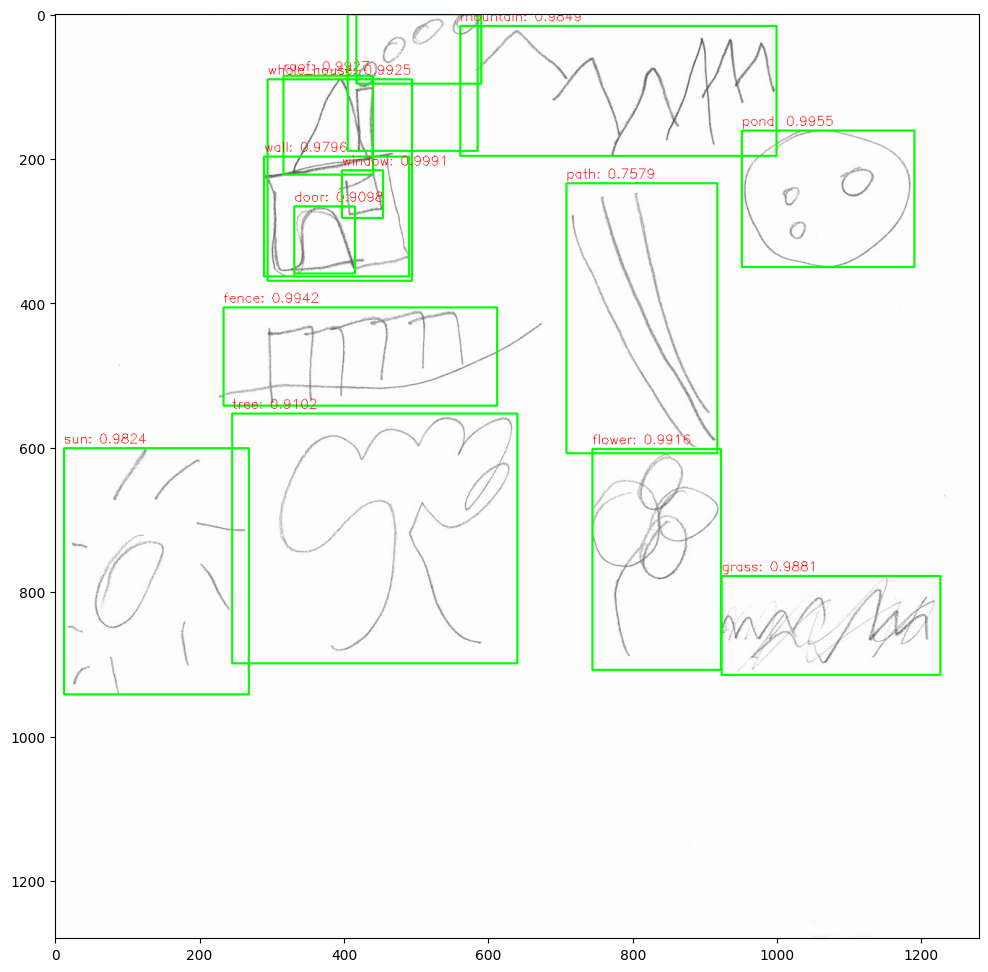

In [ ]:
scoringTable = extractFeature(test_img_lists[21])

In [ ]:
scoringTable

,feature,공격성,사회불안,우울,대인회피,자존감,정서불안,애정결핍,열등감,퇴행
No,,,,,,,,,,
5,지나치게 작은 집,0,0,1,0,1,1,0,1,1
27,굴뚝의 연기,0,0,1,0,1,0,0,0,0
30,산속이나 숲속의 집의 표현,0,1,0,1,1,1,0,0,0
31,울타리의 표현,0,1,0,1,1,1,0,1,0
32,"연못이나 우물, 비 등 물의 표현",0,0,1,0,1,1,0,0,0
,,0,2,3,2,5,4,0,2,1
